Part 1 Analysis and Preprocessing

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas.api.types import is_numeric_dtype
%matplotlib inline

## 1. Find all variables and understand them

In [2]:
sales_data = pd.read_csv('./datasets/W store sales/sales.csv')
features_data = pd.read_csv('./datasets/W store sales/features.csv')
stores_data = pd.read_csv('./datasets/W store sales/stores.csv')

### 1.1 sales.csv
Weekly sales data of different departments of different stores, with dates which are holidays or not.

In [314]:
sales_data.info()
sales_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [315]:
sales_data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


### 1.2 features.csv
Detailed information of every store every week.

In [316]:
features_data.info()
features_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [317]:
features_data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


### 1.3 stores.csv
Type and size of every store every week.

In [318]:
stores_data.info()
stores_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [319]:
stores_data.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### 1.4 Merge three datasets to one.
Type and size in stores.csv and other detailed information in features.csv are useful for forecasting sales. We can merge three dataframes by matching store id to get merged data which used for training model.

In [ ]:
merged_data = pd.merge(sales_data, stores_data, on='Store', how='left')
merged_data = pd.merge(merged_data, features_data, on=['Store', 'Date'], how='left', suffixes=('_store', '_features'))
# merged_data.to_csv('./datasets/W store sales/merged_data.csv', index=False)
merged_data.info()
merged_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Store               421570 non-null  int64  
 1   Dept                421570 non-null  int64  
 2   Date                421570 non-null  object 
 3   Weekly_Sales        421570 non-null  float64
 4   IsHoliday_store     421570 non-null  bool   
 5   Type                421570 non-null  object 
 6   Size                421570 non-null  int64  
 7   Temperature         421570 non-null  float64
 8   Fuel_Price          421570 non-null  float64
 9   MarkDown1           150681 non-null  float64
 10  MarkDown2           111248 non-null  float64
 11  MarkDown3           137091 non-null  float64
 12  MarkDown4           134967 non-null  float64
 13  MarkDown5           151432 non-null  float64
 14  CPI                 421570 non-null  float64
 15  Unemployment        421570 non-nul

,Store,Dept,Date,Weekly_Sales,IsHoliday_store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_features
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [321]:
merged_data.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


## 2. Clean data

### 2.1 Deal with missing values
1. Some missing CPI and Unemployment values in features.csv, but after merging, there is no missing values in merged data because we have not sales data on the dates when CPI and Unemployment values are missing (after 2013-5-3)
   
2. Find that MarkDown 1~5 data is missing before a specific date. And after that date there is also some missing data.
   - Considering finding there is greater correlation between MarkDowns and Weekly_Sales, I think delete missing value lines is not a good idea.
   - Considering the meaning of MarnDowns, filling missing values with 0 is better and it presents there is no markdown on that date.


In [ ]:
# fill missing markdown values with 0
filled_data = merged_data.fillna(0)
# filled_data.to_csv('./datasets/W store sales/filled_data.csv', index=False)
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Store               421570 non-null  int64  
 1   Dept                421570 non-null  int64  
 2   Date                421570 non-null  object 
 3   Weekly_Sales        421570 non-null  float64
 4   IsHoliday_store     421570 non-null  bool   
 5   Type                421570 non-null  object 
 6   Size                421570 non-null  int64  
 7   Temperature         421570 non-null  float64
 8   Fuel_Price          421570 non-null  float64
 9   MarkDown1           421570 non-null  float64
 10  MarkDown2           421570 non-null  float64
 11  MarkDown3           421570 non-null  float64
 12  MarkDown4           421570 non-null  float64
 13  MarkDown5           421570 non-null  float64
 14  CPI                 421570 non-null  float64
 15  Unemployment        421570 non-nul

### 2.2 Deal with outliers
Find outliers by Boxplot and IQR method. [Reference](https://en.wikipedia.org/wiki/Interquartile_range#:~:text=In%20descriptive%20statistics%2C%20the%20interquartile,25th%20percentiles%20of%20the%20data)

Draw boxplot for every numeric columns.

Find Weekly_Sales, Unemployment and Markdwon 1~5 have outliers.

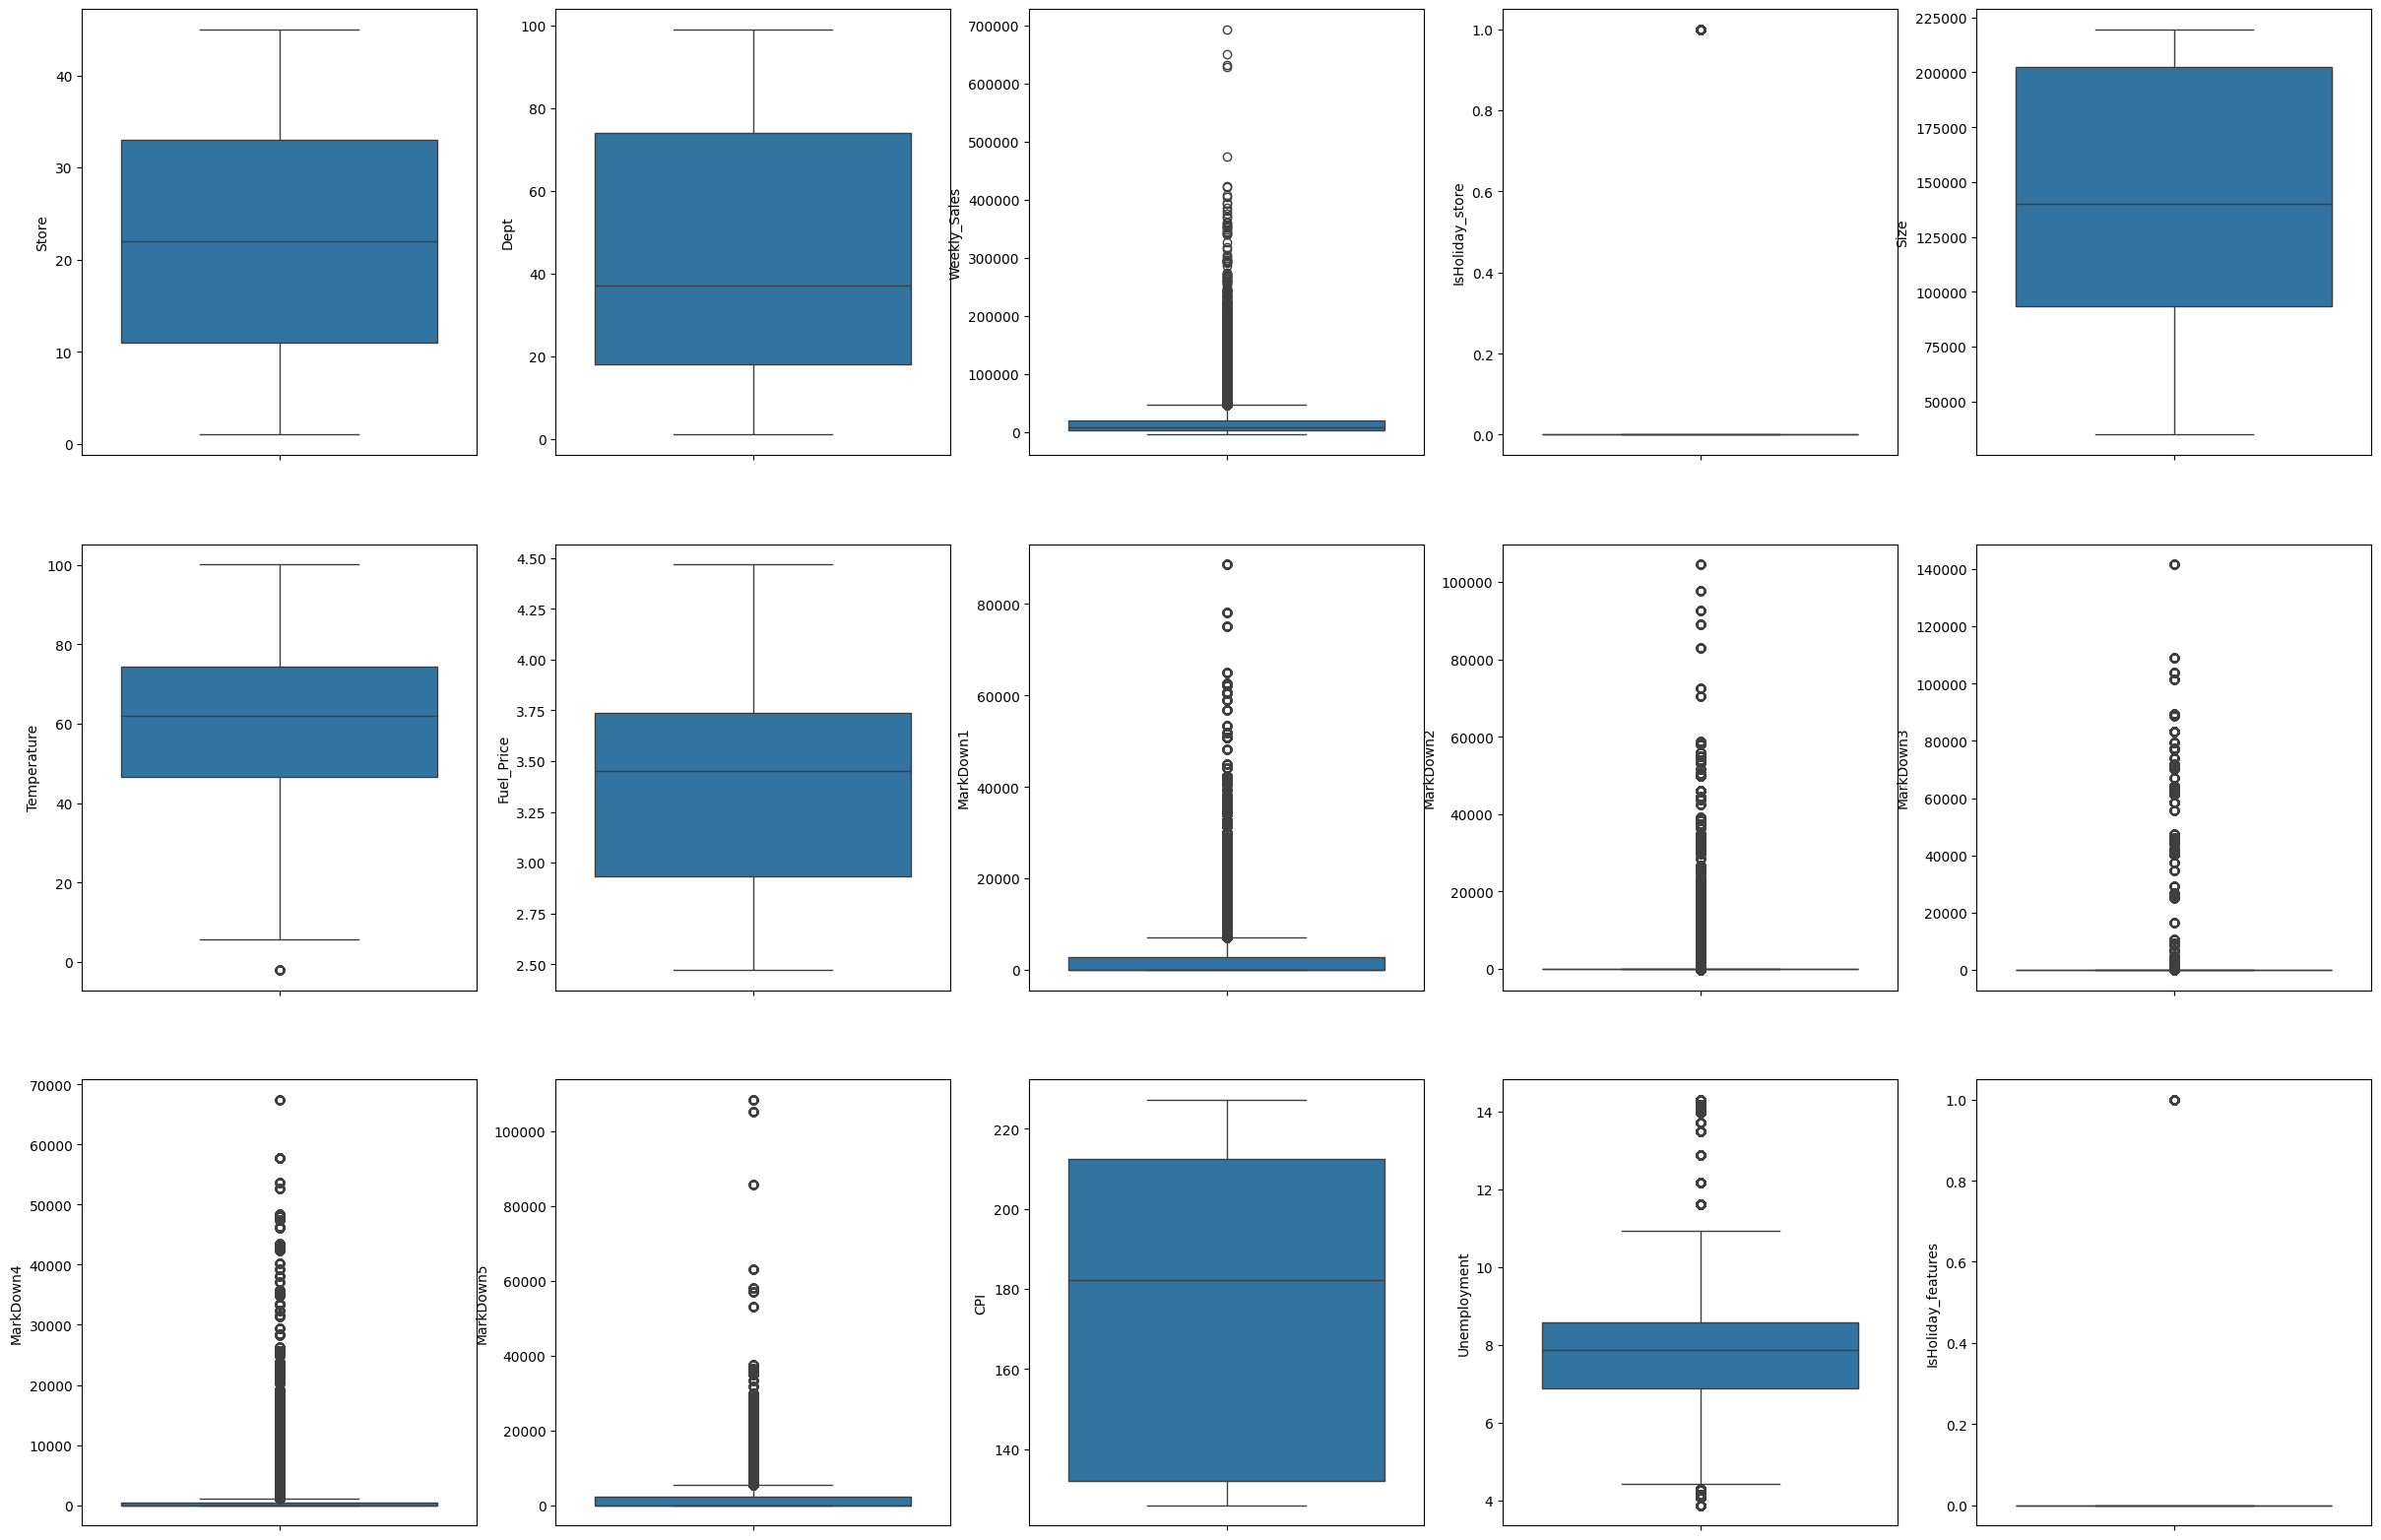

In [323]:
numeric_columns = [col for col in filled_data if is_numeric_dtype(filled_data[col])]
plt.figure(figsize=(30,20))
for i in range(len(numeric_columns)):
    plt.subplot(int(len(numeric_columns)/5 + 0.5), 5, i+1)
    sns.boxplot(y=filled_data[numeric_columns[i]], whis=1.5) # 1.5 means the data between 25% and 75% +- 1.5 * IQR
    plt.ylabel(numeric_columns[i])
plt.show()

Considering values of different stores may have significant gap. So try drawing boxplot of every store.

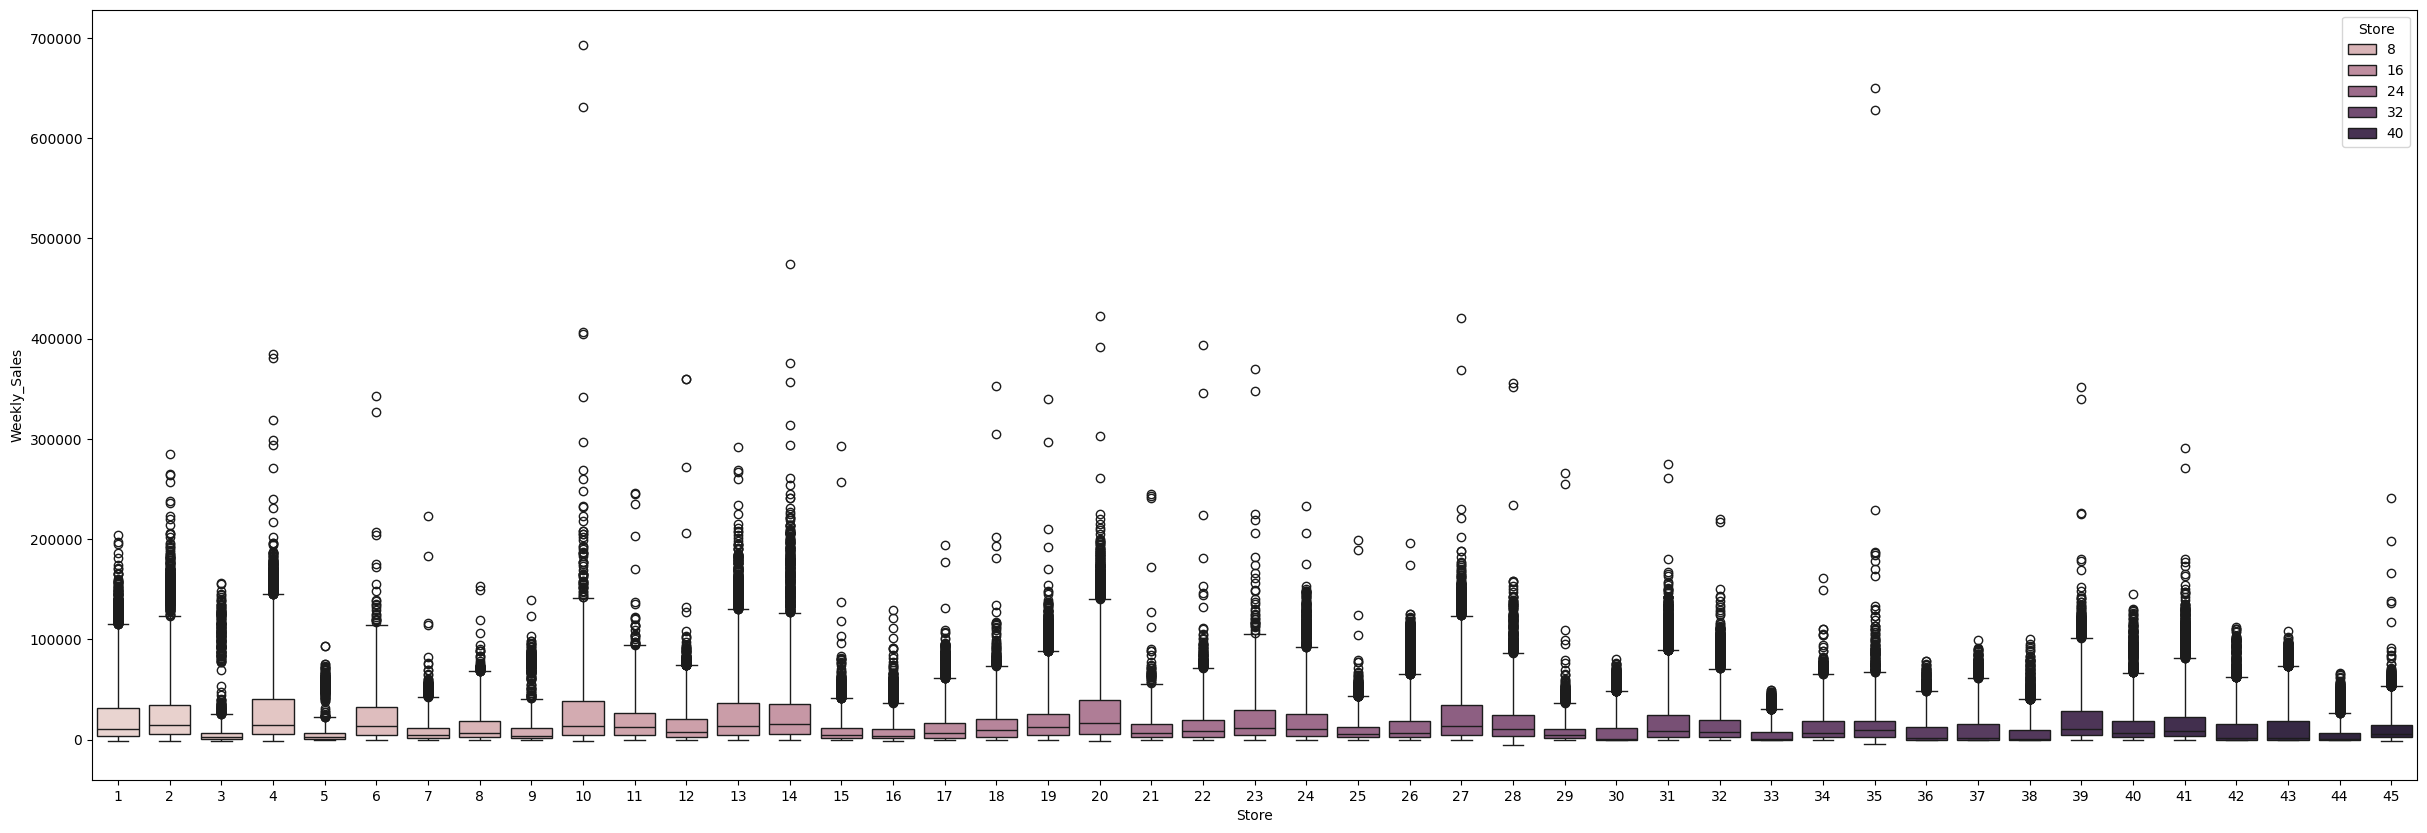

In [324]:
"""
Boxplot of Weekly_Sales for each Store
"""
plt.figure(figsize=(30,10))
sns.boxplot(x='Store', y='Weekly_Sales', data=filled_data, hue='Store', whis=3)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

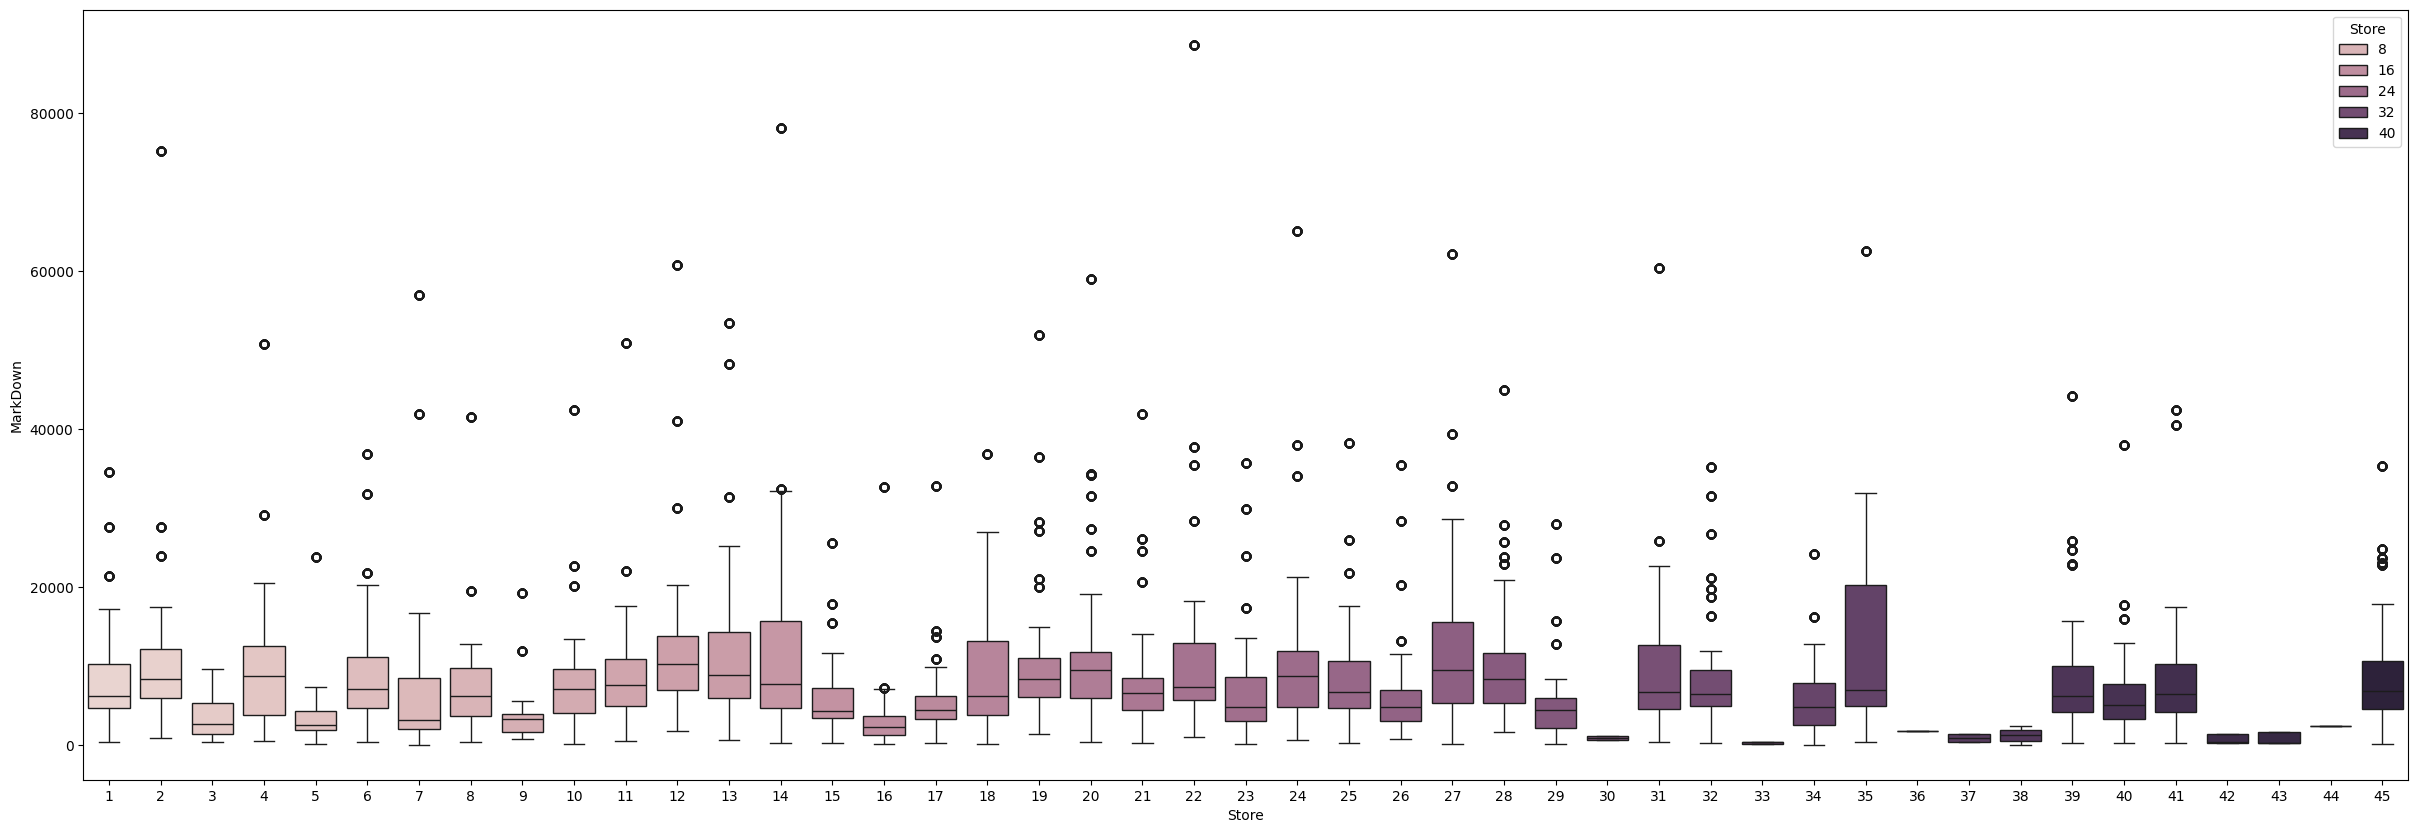

In [325]:
"""
Boxplot of MarkDown for each Store
"""
nonull_data = merged_data.dropna(axis=0)
plt.figure(figsize=(30,10))
sns.boxplot(x='Store', y='MarkDown1', data=nonull_data, hue='Store', whis=1.5)
# sns.boxplot(x='Store', y='MarkDown2', data=nonull_data, hue='Store', whis=1.5)
# sns.boxplot(x='Store', y='MarkDown3', data=nonull_data, hue='Store', whis=1.5)
# sns.boxplot(x='Store', y='MarkDown4', data=nonull_data, hue='Store', whis=1.5)
# sns.boxplot(x='Store', y='MarkDown5', data=nonull_data, hue='Store', whis=1.5)
plt.xlabel('Store')
plt.ylabel('MarkDown')
plt.show()

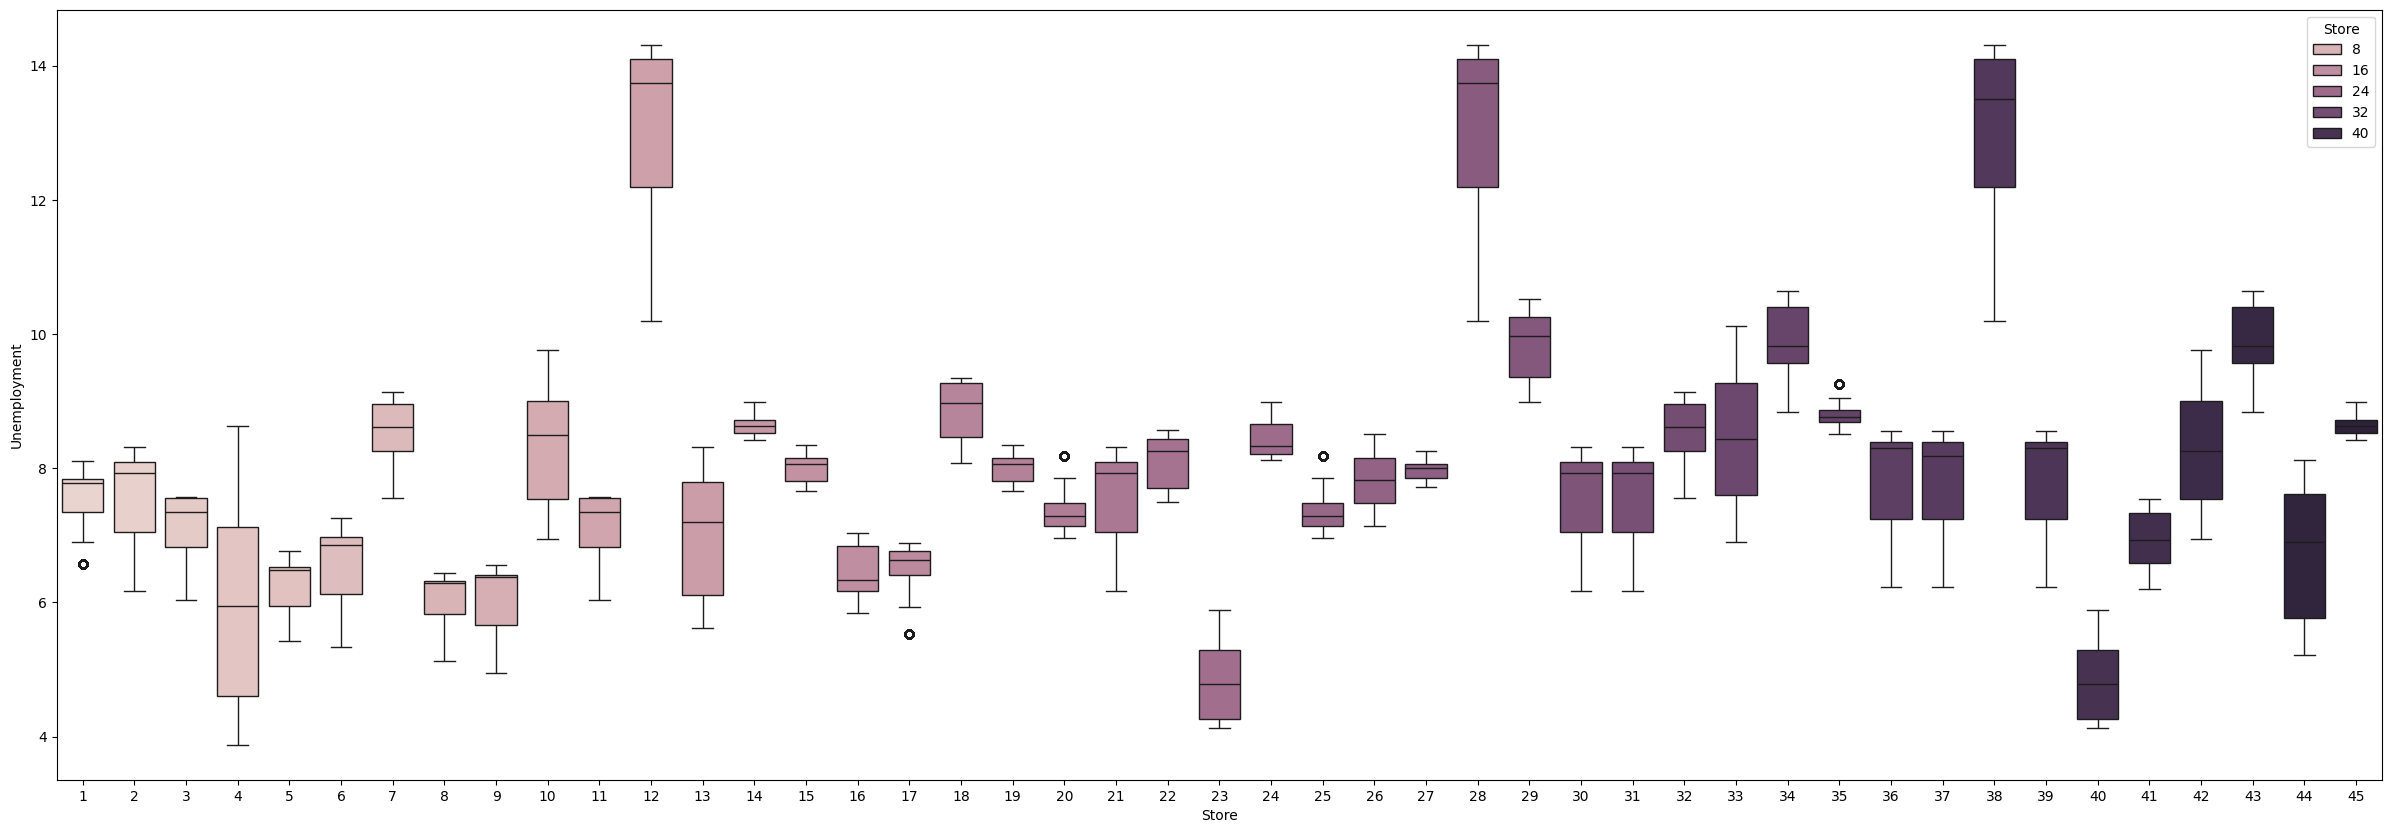

In [326]:
"""
Boxplot of Unemployment for each Store
"""
plt.figure(figsize=(30,10))
sns.boxplot(x='Store', y='Unemployment', data=filled_data, hue='Store', whis=1.5)
plt.xlabel('Store')
plt.ylabel('Unemployment')
plt.show()

After group data by store, the outliers are still there.

Considering there are very different sales and markdowns on some specific dates, the outliers of sales and markwons data are not be dealed with.

But unemployment should not have significant changes, so deal with outliers of unemployment by replacing with nearest values.

In [327]:
stores = filled_data['Store'].unique()
for s in stores:
    df = filled_data[filled_data['Store'] == s]
    q1 = df['Unemployment'].quantile(0.25)
    q3 = df['Unemployment'].quantile(0.75)
    IQR = q3 -q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    old_value = df['Unemployment'].mean()
    for index, row in df.iterrows():
        if row['Unemployment'] < lower_bound or row['Unemployment'] > upper_bound:
                filled_data.at[index, 'Unemployment'] = old_value
        old_value = filled_data.at[index, 'Unemployment']

No outliners now

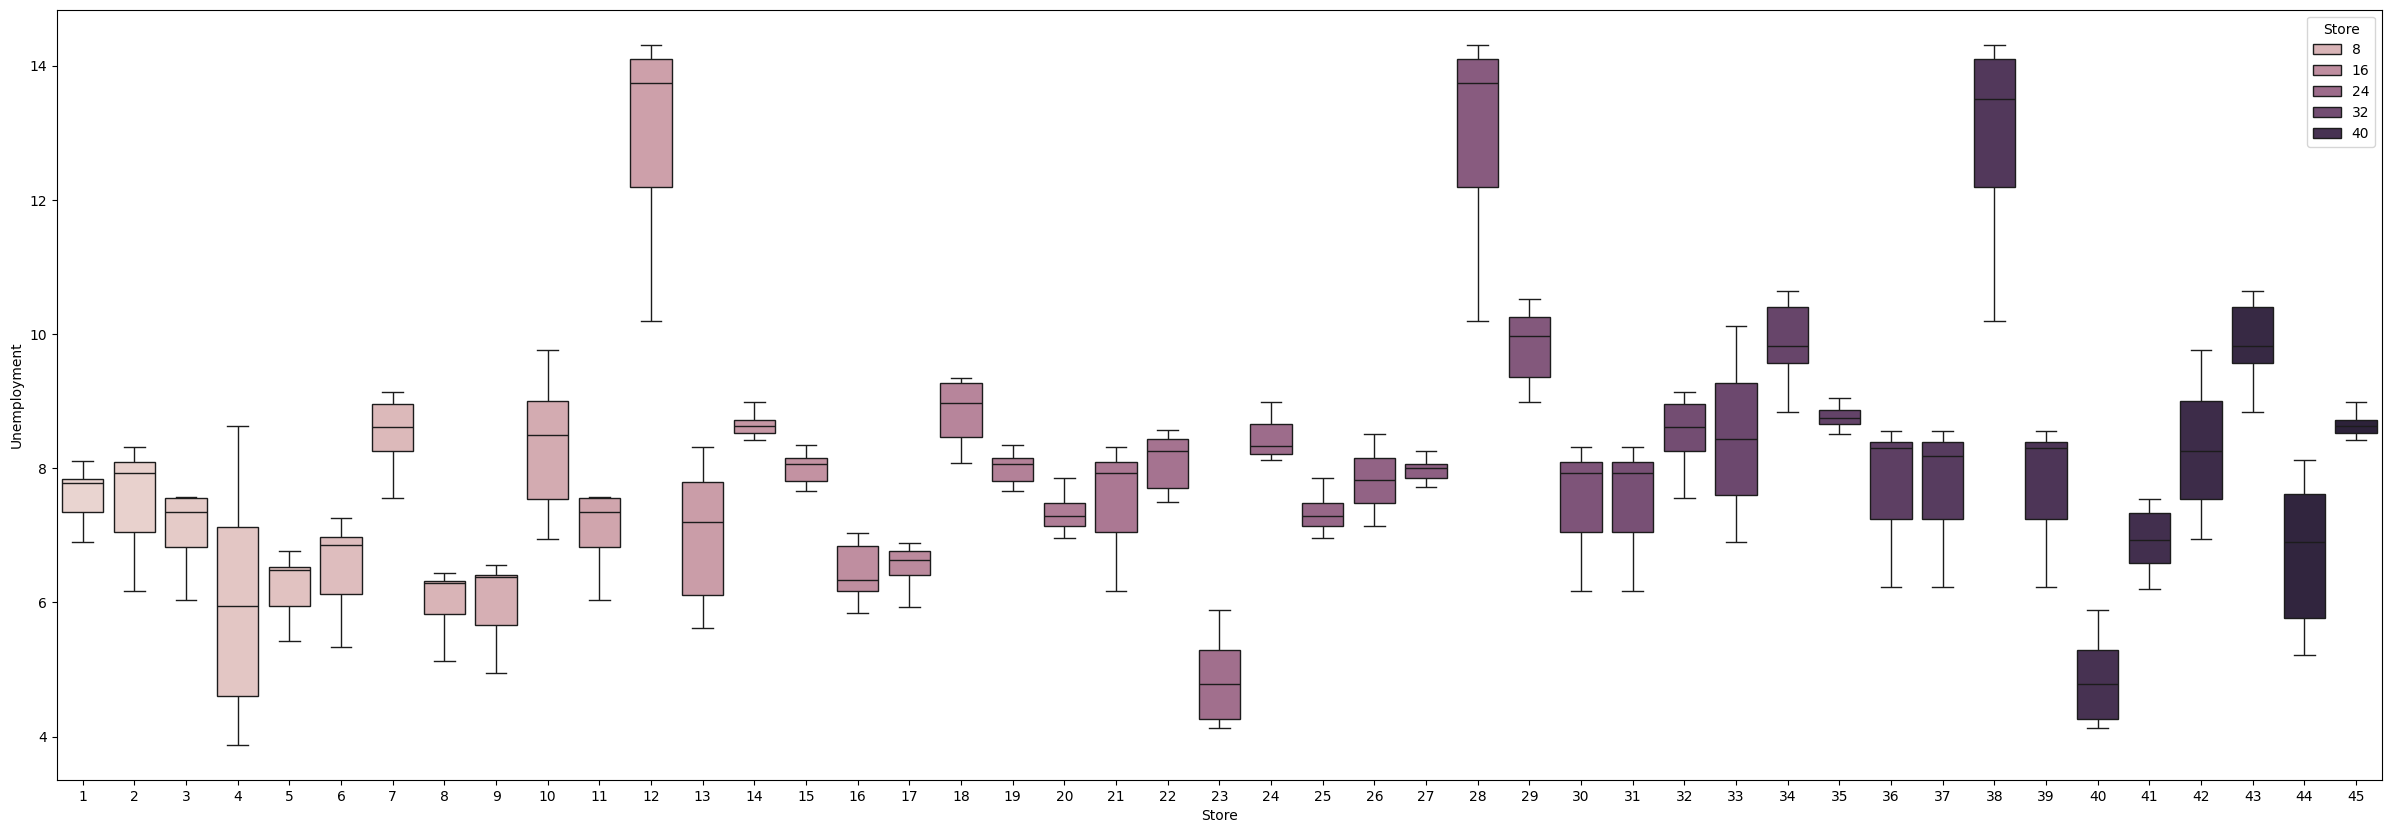

In [328]:
"""
Boxplot of Unemployment for each Store
"""
plt.figure(figsize=(30,10))
sns.boxplot(x='Store', y='Unemployment', data=filled_data, hue='Store', whis=1.5)
plt.xlabel('Store')
plt.ylabel('Unemployment')
plt.show()

## 3. Feature Engineering

### 3.1 remove duplicate features and map non-numeric features to numeric features
There are two IsHoliday columns because of the merge. Check if they are same and remove one of them.

Map Type and IsHoiday to numeric features.

Split Date into Year, Month and Day so that it will be numeric.

In [329]:
print((filled_data["IsHoliday_store"] == filled_data["IsHoliday_features"]).unique())
assert (filled_data["IsHoliday_store"] == filled_data["IsHoliday_features"]).all()
filled_data["IsHoliday"] = filled_data['IsHoliday_store'].astype(int)
result_data = filled_data.drop(['IsHoliday_store', 'IsHoliday_features'], axis=1)

[ True]


In [ ]:
print(result_data["Type"].unique())
result_data["Type"] = result_data["Type"].replace({'A': 0, 'B': 1, 'C': 2})

In [331]:
result_data["Year"] = [int(date.split('-')[0]) for date in result_data["Date"]]
result_data["Month"] = [int(date.split('-')[1]) for date in result_data["Date"]]
result_data["Day"] = [int(date.split('-')[2]) for date in result_data["Date"]]

Check if dates are continuous

In [332]:

# for (store, dept), df in result_data.groupby(['Store', 'Dept']):
#     # dates = df["Date"]
#     # for i in range(1, len(dates)):
#         # print(datetime.strptime(dates[i], "%Y-%m-%d") - datetime.strptime(dates[i-1], "%Y-%m-%d"))
#         # if datetime.strptime(dates[i], "%Y-%m-%d") - datetime.strptime(dates[i-1], "%Y-%m-%d") != timedelta(days=7):
#         #     print(f"Stroe:{store},Dept:{dept}, Not Continuous!")
#     # print(f"Stroe:{store},Dept:{dept},{min(df['Date'])}~{max(df['Date'])}:{len(df)} items")


### 3.2 Create new features

In correlation anlysis, find that Size, Type and Dept are top-3 correlated variables with Weekly_Sales.

Use Dept and Size create new meaningful features:
+ `Dept_num`: departments quantity of a store may affects sales.
+ `Size_per_dept`: average size of departments of a store may affects sales.

In [333]:
for i in result_data["Store"].unique():
    result_data.loc[result_data["Store"] == i, "Dept_num"] = len(result_data[result_data["Store"] == i]["Dept"].unique())
result_data["Size_per_dept"] = result_data["Size"] / result_data["Dept_num"]
result_data["Dept_num"] = result_data["Dept_num"].astype(int)

In [ ]:
result_data.info()
result_data.to_csv('./datasets/W store sales/result_data.csv')
result_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          421570 non-null  int64  
 1   Dept           421570 non-null  int64  
 2   Date           421570 non-null  object 
 3   Weekly_Sales   421570 non-null  float64
 4   Type           421570 non-null  int64  
 5   Size           421570 non-null  int64  
 6   Temperature    421570 non-null  float64
 7   Fuel_Price     421570 non-null  float64
 8   MarkDown1      421570 non-null  float64
 9   MarkDown2      421570 non-null  float64
 10  MarkDown3      421570 non-null  float64
 11  MarkDown4      421570 non-null  float64
 12  MarkDown5      421570 non-null  float64
 13  CPI            421570 non-null  float64
 14  Unemployment   421570 non-null  float64
 15  IsHoliday      421570 non-null  int32  
 16  Year           421570 non-null  int64  
 17  Month          421570 non-nul

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Day,Dept_num,Size_per_dept
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.00,0.00,...,0.00,0.00,211.096358,8.106,0,2010,2,5,77,1965.129870
1,1,1,2010-02-12,46039.49,0,151315,38.51,2.548,0.00,0.00,...,0.00,0.00,211.242170,8.106,1,2010,2,12,77,1965.129870
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.00,0.00,...,0.00,0.00,211.289143,8.106,0,2010,2,19,77,1965.129870
3,1,1,2010-02-26,19403.54,0,151315,46.63,2.561,0.00,0.00,...,0.00,0.00,211.319643,8.106,0,2010,2,26,77,1965.129870
4,1,1,2010-03-05,21827.90,0,151315,46.50,2.625,0.00,0.00,...,0.00,0.00,211.350143,8.106,0,2010,3,5,77,1965.129870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,1,118221,64.88,3.997,4556.61,20.64,...,1601.01,3288.25,192.013558,8.684,0,2012,9,28,74,1597.581081
421566,45,98,2012-10-05,628.10,1,118221,64.89,3.985,5046.74,0.00,...,2253.43,2340.01,192.170412,8.667,0,2012,10,5,74,1597.581081
421567,45,98,2012-10-12,1061.02,1,118221,54.47,4.000,1956.28,0.00,...,599.32,3990.54,192.327265,8.667,0,2012,10,12,74,1597.581081
421568,45,98,2012-10-19,760.01,1,118221,56.47,3.969,2004.02,0.00,...,437.73,1537.49,192.330854,8.667,0,2012,10,19,74,1597.581081


## 4. EDA with Visualization with Power BI

1. Discrete variables: use pie charts to visualize the proportion of each Type, Year, Month, and IsHoliday.
<div align=center>
<img src="./resources/powerbi/pies.png"/>
</div>
We can find that the distribution of Year and Month are balanced, but the distribution of Type and IsHoliday is not balanced. This unbalanced data may affect the model performance.

2. Continuous variables: use line charts to visualize

We can visualize sales varying with dates of a specific Dept of a specific Store by filtter of Power BI. And then we can see the data more clearly.

For example, we can compare sales data and temperatures. We can find that sales data has a contrary relationship with temperature.
<div align=center>
<img src="./resources/powerbi/temperature.png"/>
</div>

Then we can analyze fuel prices and unemployment. We can find that there is not obvious relationship of them.
<div align=center>
<img src="./resources/powerbi/fuel.png"/>
</div>
<div align=center>
<img src="./resources/powerbi/unemployment.png"/>
</div>

## 5. Correlation analysis

Correlation before feature engineering: we can find Size(0.24) and Dept(0.15) have stonger correation with Weekly_Sales

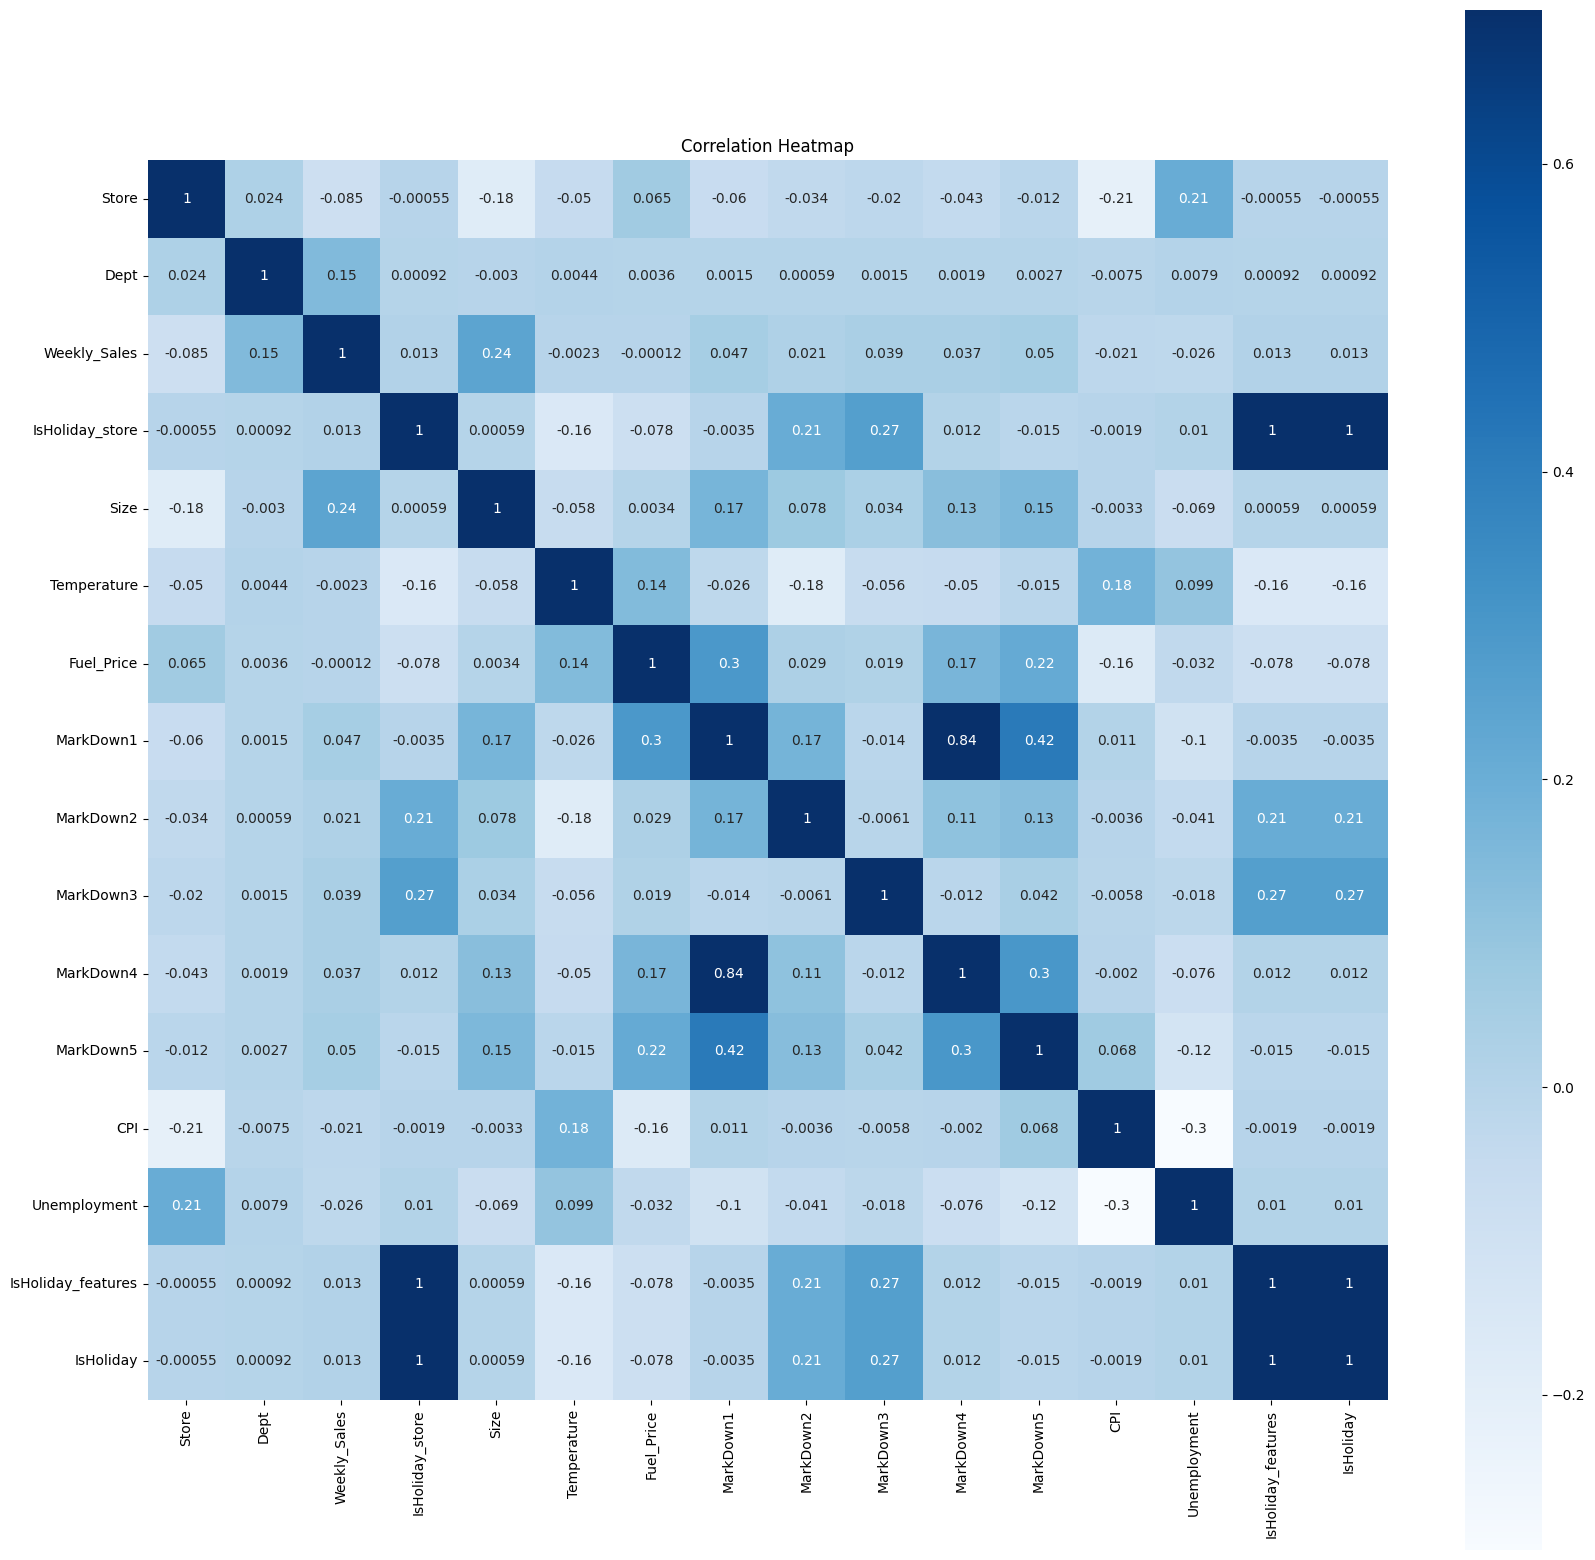

In [335]:
numeric_columns = [col for col in filled_data if is_numeric_dtype(filled_data[col])]
corrmat = filled_data[numeric_columns].corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Heatmap')
sns.heatmap(corrmat, vmax= 0.7, square = True, annot = True, cmap='Blues')
plt.show()

Correlation after feature engineering: we can find Size(0.24), Dept(0.15), Type(-0.18) and our new feature Dept_num(0.16) and Size_per_dept (0.24) have stonger correation with Weekly_Sales

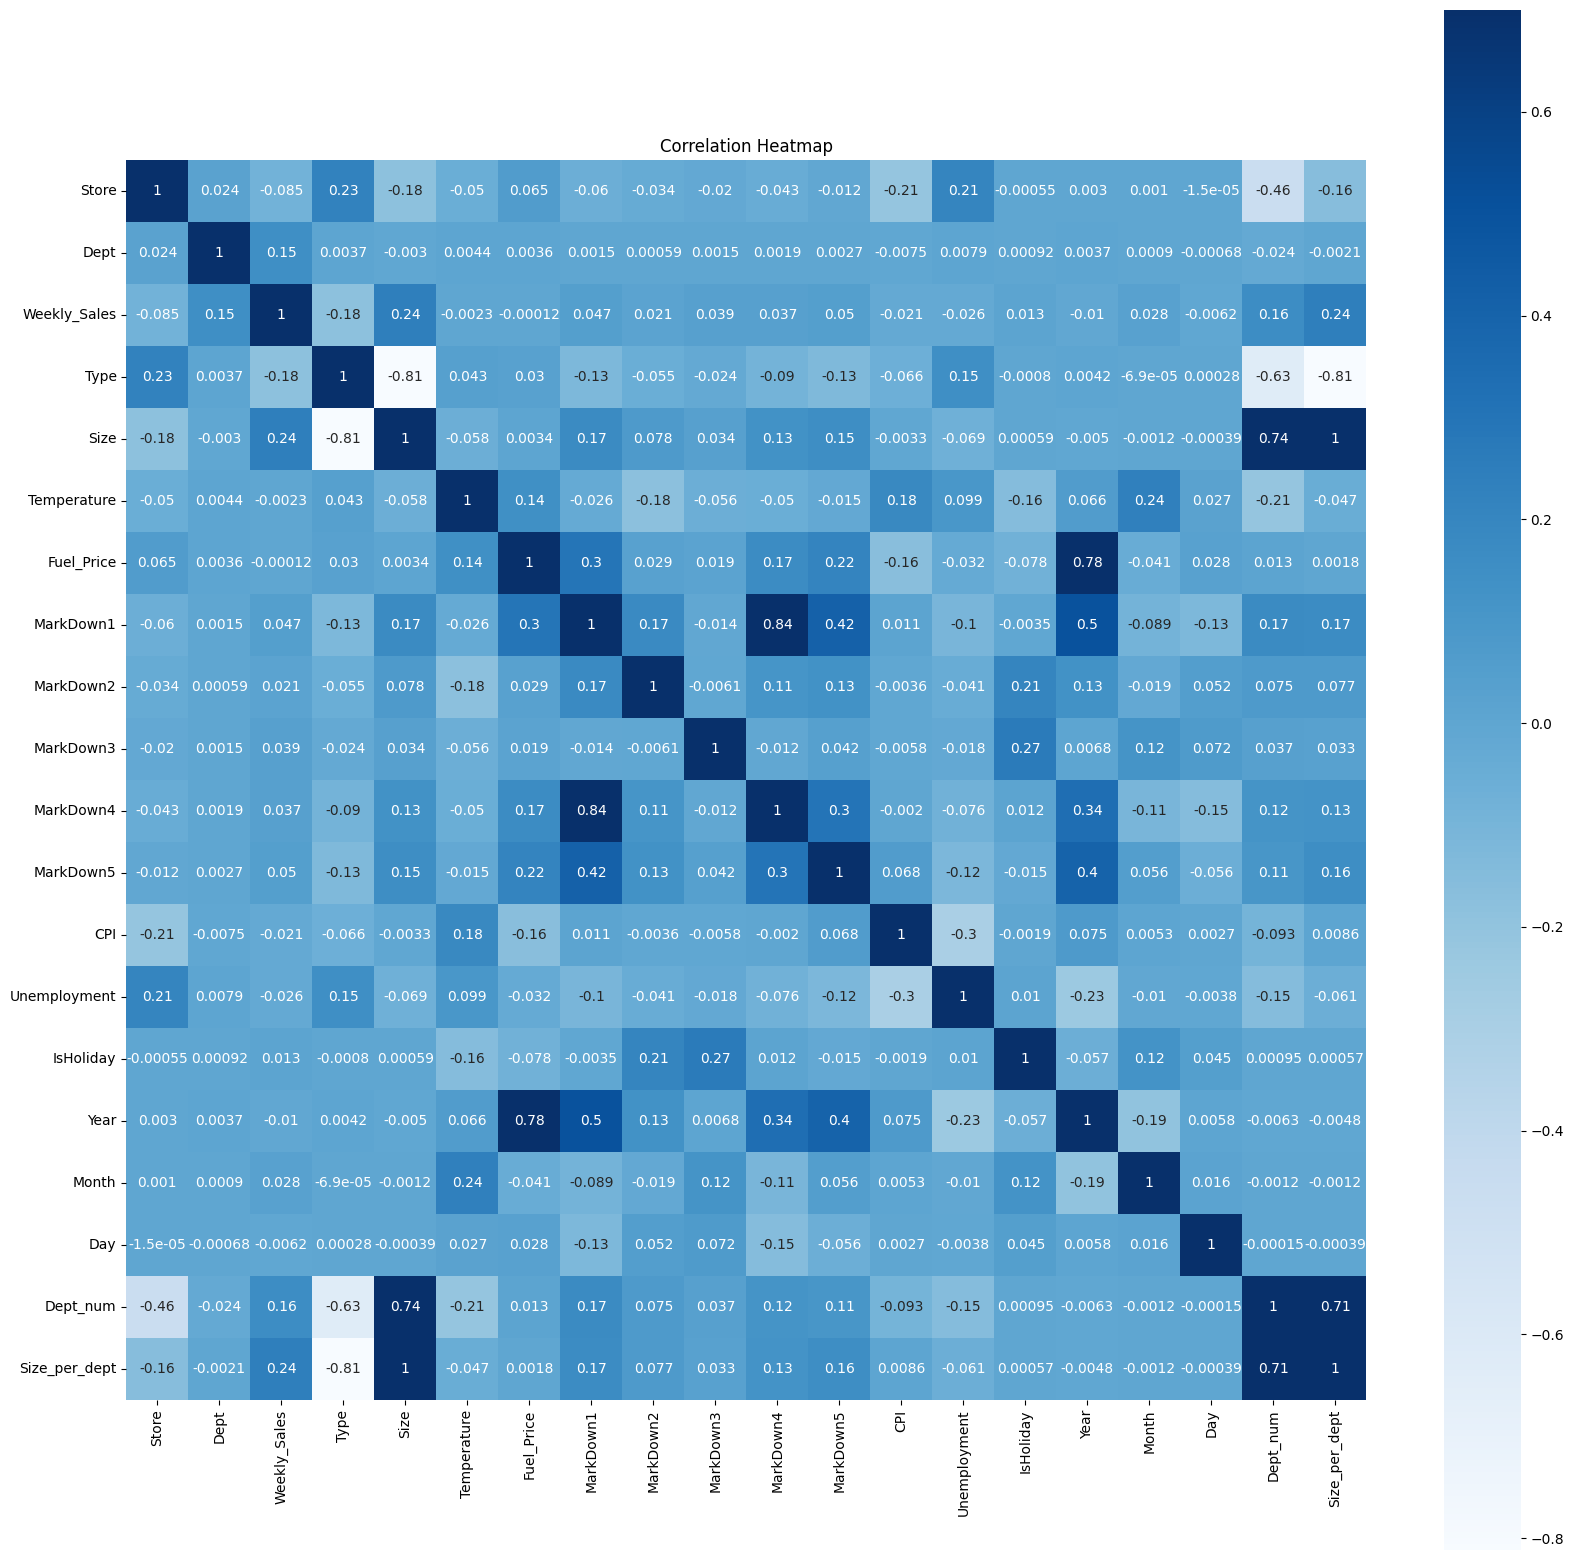

In [336]:
numeric_columns = [col for col in result_data if is_numeric_dtype(result_data[col])]
corrmat = result_data[numeric_columns].corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Heatmap')
sns.heatmap(corrmat, vmax= 0.7, square = True, annot = True, cmap='Blues')
plt.show()

Visualize correlation between every feature and Weekly_Sales.

We can find some useful information. For example, the data of `Type=0` and `Type=1` are similar, but they are different from `Type=2`. We can try reclassifying them into two types. 

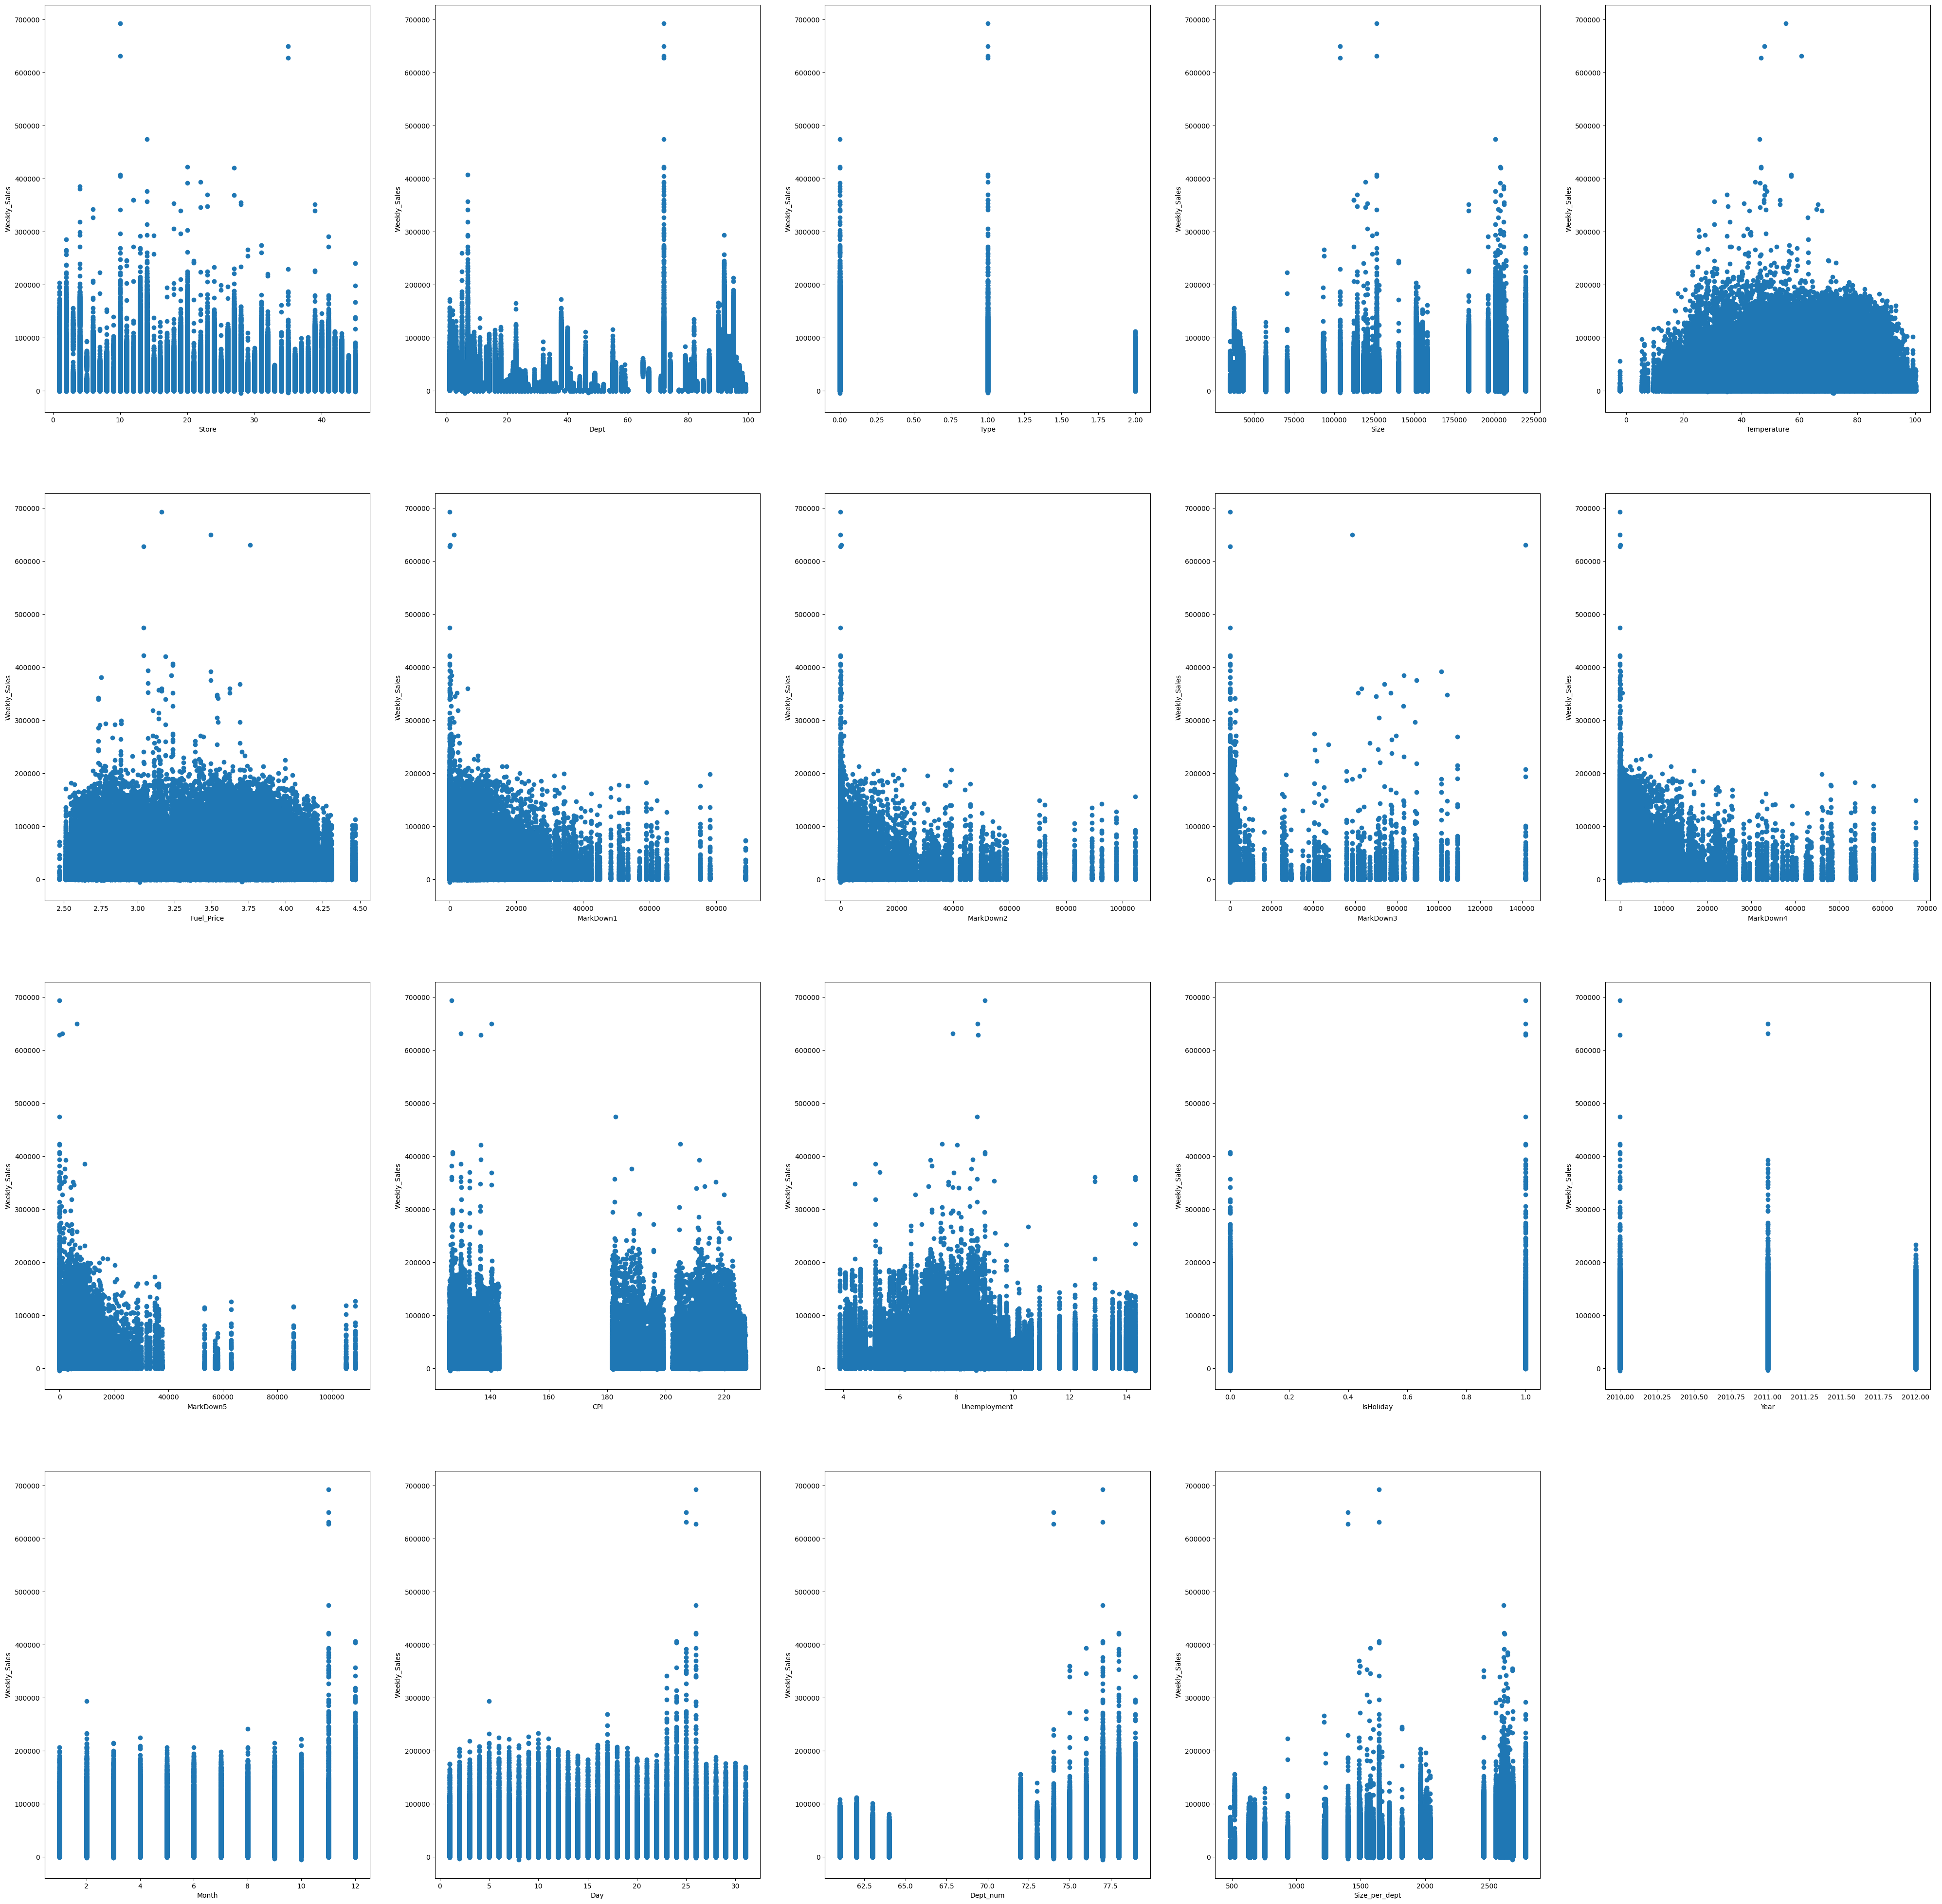

In [337]:
numeric_columns = [col for col in result_data.columns if is_numeric_dtype(result_data[col]) and col!='Weekly_Sales']
plt.figure(figsize=(50,50))
for i in range(len(numeric_columns)):
    plt.subplot(int(len(numeric_columns)/5 + 0.5), 5, i+1)
    plt.scatter(result_data[numeric_columns[i]], result_data['Weekly_Sales'])
    plt.xlabel(numeric_columns[i])
    plt.ylabel("Weekly_Sales")
plt.show()

## 6. Summary

### 1. Fina all variables
- Merge three dataframes into one by matching store id.

### 2. Clean data
- Deal with missing values
  - **Filling missing values** of markdowns with 0 is better than deleting them.
  - `0` is meaningful because it can presents there is no markdown on that date.

- Deal with outliers
  - Find outliers by **Boxplot** and **IQR** method.
  - Deal with outliers of unemployment by replacing with nearest values.

### 3. Feature Engineering
- Map `Type` and `IsHoiday` to numeric features.
- Split Date into Year, Month and Day so that it will be numeric.
- Use Dept and Size **create new meaningful features** according to correlation anlysis:
  - `Dept_num`: departments quantity of a store may affects sales.
  - `Size_per_dept`: average size of departments of a store may affects sales.

### 4. EDA with Visulization with Power BI
- Use pie charts to visualize the proportion of each Type, Year, Month, and IsHoliday.
    - the distribution of Year and Month are balanced
    - the distribution of Type and IsHoliday is not balanced, which may affect the model performance.
- Visualize sales varying with dates of a specific Dept of a specific Store by filtter of Power BI.
    - sales data has a contrary relationship with temperature.
    - sales data has not obvious relationship with fuel prices and unemployment.

### 5. Correlation analysis
-  Size(0.24), Dept(0.15) and Type(-0.18) have stonger correation with Weekly_Sales.
-  New feature Dept_num(0.16) and Size_per_dept (0.24) have stonger correation with Weekly_Sales.
-  The data of `Type=0` and `Type=1` are similar, but they are different from `Type=2`. We can try reclassifying them into two types. 